In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv('customer_segmentation.csv')

In [6]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [8]:
# finding the number of rows and columns
df.shape

(2240, 29)

In [9]:
# getting some informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
# checking for missing values
df.isnull()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
# checking for missing values
df.isnull().sum().sum()

np.int64(0)

In [20]:
df.dropna(inplace=True)

In [21]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [22]:
df['Education'].value_counts()

,count
Education,
Graduation,1116
PhD,481
Master,365
2n Cycle,200
Basic,54


In [23]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"],dayfirst = True)

In [24]:
# converting to date time
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [26]:
df ["Age"] = 2026 - df["Year_Birth"]

In [27]:
df ["Age"]

,Age
0,69
1,72
2,61
3,42
4,45
...,...
2235,59
2236,80
2237,45
2238,70


In [33]:
spend_cols = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts","MntGoldProds"]

In [34]:
df["Total Spending"] = df[spend_cols].sum(axis=1)

In [35]:
df [["Total Spending"]]

,Total Spending
0,1617
1,27
2,776
3,53
4,422
...,...
2235,1341
2236,444
2237,1241
2238,843


In [38]:
df["Customer Since"] = (pd.Timestamp("today") - df["Dt_Customer"]).dt.days

In [40]:
df["Customer Since"]

,Customer Since
0,4916
1,4366
2,4565
3,4392
4,4414
...,...
2235,4634
2236,4272
2237,4408
2238,4409


EDA

<function matplotlib.pyplot.show(close=None, block=None)>

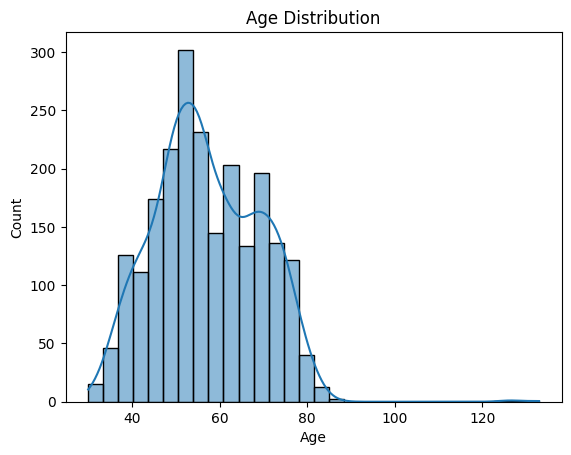

In [41]:
sns.histplot(df ["Age"], bins= 30, kde=True)
plt.title("Age Distribution")
plt.show()

Text(0.5, 1.0, 'Income Distribution')

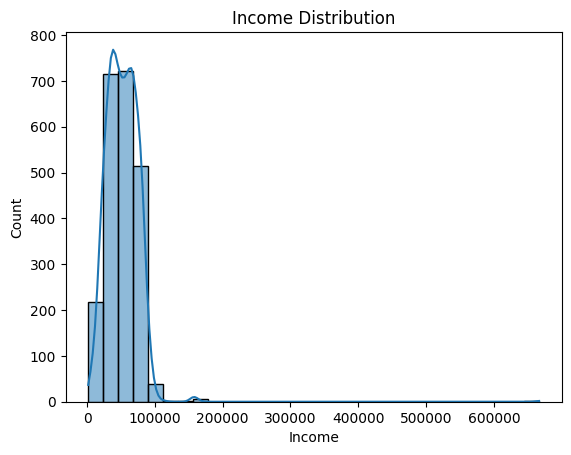

In [42]:
sns.histplot(df ["Income"], bins = 30, kde=True)
plt.title("Income Distribution")

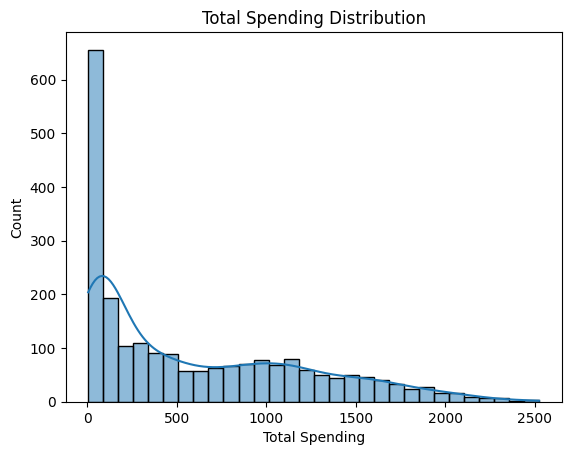

In [44]:
sns.histplot(df["Total Spending"], bins = 30, kde=True)
plt.title("Total Spending Distribution")
plt.show()

CARTEGORICAL ANALYSIS

Text(0.5, 1.0, 'Income by Education Level')

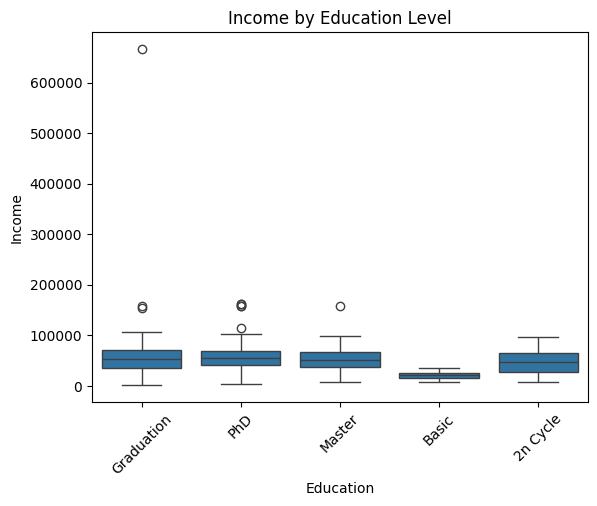

In [46]:
sns.boxplot(x= "Education", y = "Income", data = df)
plt.xticks(rotation = 45)
plt.title("Income by Education Level")

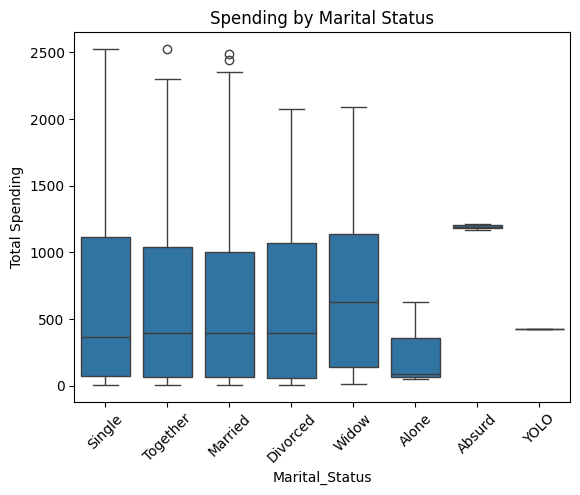

In [49]:
sns.boxplot(x = "Marital_Status", y= "Total Spending", data=df)
plt.xticks(rotation = 45)
plt.title("Spending by Marital Status")
plt.show()

In [57]:
corr = df [["Income","Age", "Recency","Total Spending", "NumWebPurchases", "NumStorePurchases"]].corr()

In [58]:
corr

,Income,Age,Recency,Total Spending,NumWebPurchases,NumStorePurchases
Income,1.000000,0.161791,-0.003970,0.667576,0.387878,0.529362
Age,0.161791,1.000000,0.016295,0.113487,0.153051,0.127891
Recency,-0.003970,0.016295,1.000000,0.020066,-0.005641,-0.000434
Total Spending,0.667576,0.113487,0.020066,1.000000,0.528973,0.675181
NumWebPurchases,0.387878,0.153051,-0.005641,0.528973,1.000000,0.516240
NumStorePurchases,0.529362,0.127891,-0.000434,0.675181,0.516240,1.000000


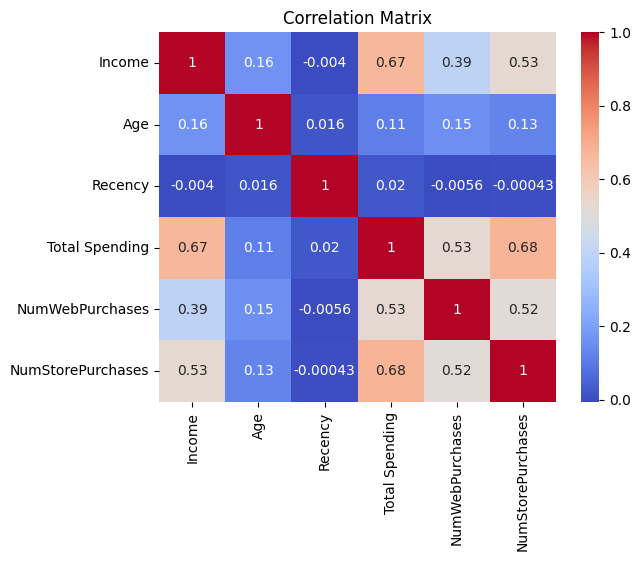

In [59]:
sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [63]:
pivot_income = df.pivot_table(values = "Income", index = "Education", columns = "Marital_Status", aggfunc= "mean")

In [64]:
pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50800.258741,51322.182927,55758.480702,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52109.009804,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,58138.031579,53314.614583,56041.422414,60288.083333,48432.0


Text(0.5, 1.0, 'Average Income by Education and Marital Status')

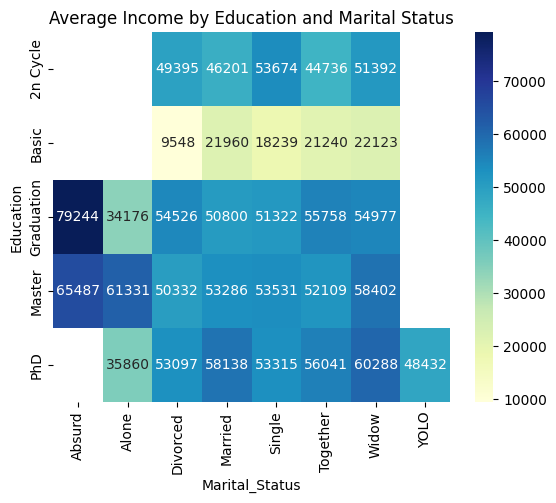

In [65]:
sns.heatmap(pivot_income, annot= True, fmt= ".0f", cmap = "YlGnBu")
plt.title("Average Income by Education and Marital Status")

In [68]:
group1 = df.groupby("Education")["Total Spending"].mean().sort_values(ascending=True)

In [69]:
group1

,Total Spending
Education,
Basic,81.796296
2n Cycle,494.930000
Master,609.767123
Graduation,621.686380
PhD,676.733888


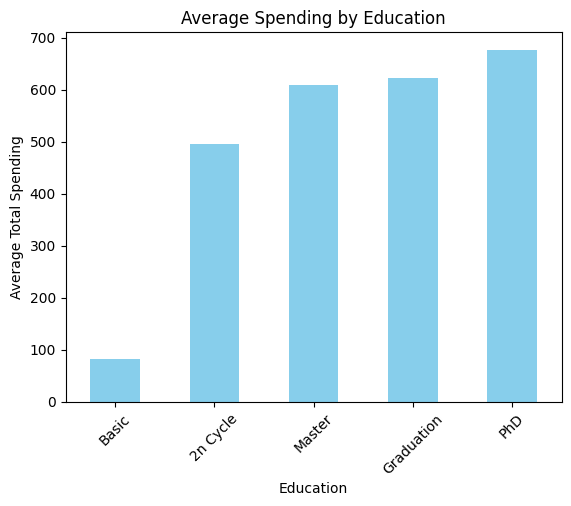

In [70]:
group1.plot(kind="bar", color = "skyblue")
plt.title("Average Spending by Education")
plt.ylabel("Average Total Spending")
plt.xticks(rotation = 45)
plt.show()

In [74]:
df["AcceptedAny"] = df[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5","Response"]].sum(axis=1)

In [76]:
df ["AcceptedAny"].unique()

array([1, 0, 3, 2, 4, 5])

In [78]:
df ["AcceptedAny"] = df ["AcceptedAny"].apply(lambda x: 1 if x > 0 else 0 )

In [79]:
df ["AcceptedAny"].unique()

array([1, 0])

In [81]:
group2 = df.groupby("Marital_Status") ["AcceptedAny"].mean().sort_values(ascending=False)

In [82]:
group2

,AcceptedAny
Marital_Status,
Absurd,0.500000
YOLO,0.500000
Widow,0.342105
Alone,0.333333
Single,0.312102
Divorced,0.297414
Married,0.252042
Together,0.251309


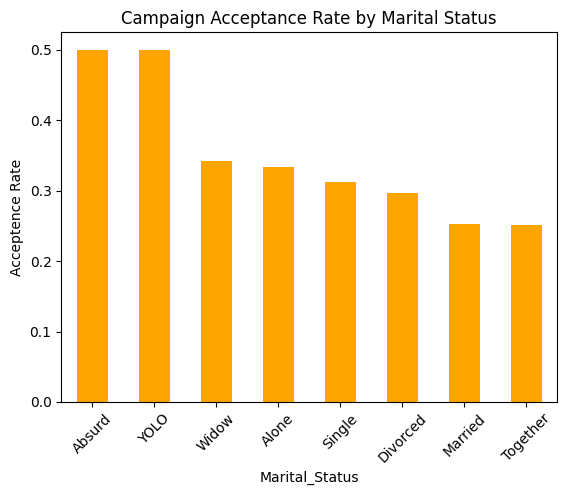

In [83]:
group2.plot(kind="bar", color = "orange")
plt.title("Campaign Acceptance Rate by Marital Status")
plt.ylabel("Acceptence Rate")
plt.xticks(rotation = 45)
plt.show()

In [84]:
bins = [18, 30, 40, 50, 60, 70, 90]

In [85]:
labels = ["18-29", "30-39","40-49", "50-59","60-69", "70+"]

In [86]:
df ["AgeGroup"] = pd.cut(df["Age"], bins = bins, labels = labels)

In [87]:
df ["AgeGroup"]

,AgeGroup
0,60-69
1,70+
2,60-69
3,40-49
4,40-49
...,...
2235,50-59
2236,70+
2237,40-49
2238,60-69


In [88]:
group3 = df.groupby("AgeGroup") ["Income"].mean()

/tmp/ipython-input-2678306087.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group3 = df.groupby("AgeGroup") ["Income"].mean()


In [89]:
group3

,Income
AgeGroup,
18-29,10960.500000
30-39,47905.475676
40-49,48057.587649
50-59,50479.321534
60-69,55980.030928
70+,58767.083102


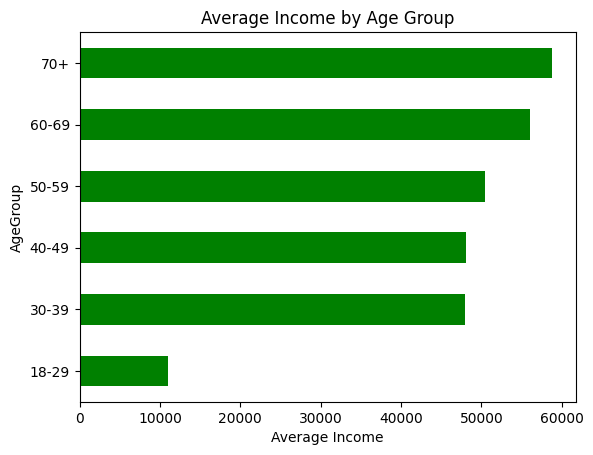

In [90]:
group3.plot(kind="barh", color = "green")
plt.title("Average Income by Age Group")
plt.xlabel("Average Income")
plt.show()

In [91]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total Spending,Customer Since,AcceptedAny,AgeGroup
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,69,1617,4916,1,60-69
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,72,27,4366,0,70+
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,61,776,4565,0,60-69
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,42,53,4392,0,40-49
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,45,422,4414,0,40-49


In [92]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total Spending', 'Customer Since', 'AcceptedAny', 'AgeGroup'],
      dtype='object')

In [93]:
Age - Income - Total Spending - NumWebPurchases - NumStorePurchases- NumWebVisitsMonth - Recency

SyntaxError: invalid syntax (ipython-input-1949160001.py, line 1)

In [107]:
selected_columns = df[['Age', 'Income','Total Spending', 'NumWebPurchases', 'NumStorePurchases','NumWebVisitsMonth','Recency']]
display(selected_columns.head())

,Age,Income,Total Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,69,58138.0,1617,8,4,7,58
1,72,46344.0,27,1,2,5,38
2,61,71613.0,776,8,10,4,26
3,42,26646.0,53,2,4,6,26
4,45,58293.0,422,5,6,5,94


In [111]:
features = ["Age", "Income","Total Spending","NumWebPurchases","NumStorePurchases",'NumWebVisitsMonth', 'Recency']

In [112]:
X = df[features].copy()

In [113]:
X

,Age,Income,Total Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,69,58138.0,1617,8,4,7,58
1,72,46344.0,27,1,2,5,38
2,61,71613.0,776,8,10,4,26
3,42,26646.0,53,2,4,6,26
4,45,58293.0,422,5,6,5,94
...,...,...,...,...,...,...,...
2235,59,61223.0,1341,9,4,5,46
2236,80,64014.0,444,8,5,7,56
2237,45,56981.0,1241,2,13,6,91
2238,70,69245.0,843,6,10,3,8


In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [115]:
X_scaled = scaler.fit_transform(X)

In [116]:
X_scaled


array([[ 0.98644293,  0.2340627 ,  1.67548812, ..., -0.55414289,
         0.69323197,  0.31053212],
       [ 1.23680074, -0.23455948, -0.96235832, ..., -1.16951781,
        -0.1315745 , -0.38050944],
       [ 0.31882209,  0.76947764,  0.28024985, ...,  1.29198186,
        -0.54397773, -0.79513438],
       ...,
       [-1.01641959,  0.18809052,  1.05169551, ...,  2.21504423,
         0.28082874,  1.4507507 ],
       [ 1.06989553,  0.67538765,  0.39140438, ...,  1.29198186,
        -0.95638097, -1.41707178],
       [ 1.23680074,  0.02470453, -0.7218    , ..., -0.55414289,
         0.69323197, -0.31140528]])

**K MEANS**

In [117]:
from sklearn.cluster import KMeans

In [118]:
wcss = []

In [119]:
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

In [120]:
wcss

[10218.620143748776,
 9303.349676497406,
 8159.355714963868,
 7578.217065195131,
 7102.818964506338,
 6820.512393778453,
 6445.565381528349,
 6224.74049035457]

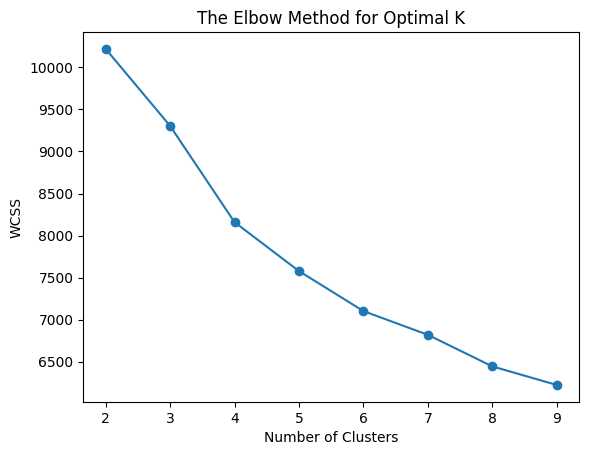

In [121]:
# Plotting the Elbow Method
plt.plot(range(2, 10), wcss,marker = 'o')
plt.title('The Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') # Within-Cluster Sum of Squares
plt.show()

In [123]:
# Initialize K-Means with the chosen cluster number (6)
kmeans = KMeans(n_clusters=6)

# Create the Cluster column in the original dataframe
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [124]:
# View the updated dataframe
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Total Spending,Customer Since,AcceptedAny,AgeGroup,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,69,1617,4916,1,60-69,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,72,27,4366,0,70+,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,61,776,4565,0,60-69,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,42,53,4392,0,40-49,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,45,422,4414,0,40-49,0


In [127]:
# Group by cluster to see the average characteristics of each group
cluster_summary = df.groupby('Cluster')[features].mean()


In [126]:
cluster_summary

,Age,Income,Total Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,60.470414,54419.343195,635.612426,7.248521,5.964497,6.701183,45.715976
1,48.297078,30232.493506,96.334416,2.103896,3.042208,7.110390,55.582792
2,58.820312,65846.667969,1136.894531,7.132812,10.867188,5.449219,45.531250
3,64.403263,40826.498834,123.046620,2.090909,3.601399,5.433566,39.365967
4,46.724138,79881.741379,1320.096552,4.458621,8.079310,2.427586,49.010345
5,70.672474,73957.961672,1200.139373,4.498258,7.996516,2.480836,56.320557


In [128]:
# Check how many customers are in each cluster
print(df['Cluster'].value_counts())

Cluster
1    616
3    429
0    338
4    290
5    287
2    256
Name: count, dtype: int64


**Principal Component Analysis (PCA)**
This is where we turn the complex data into a 2D plot.

In [129]:
from sklearn.decomposition import PCA

In [130]:
# Reduce features to 2 components for plotting
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

# Add PCA results to the dataframe
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

In [131]:
pca_data

array([[ 1.1075188 , -0.21175951],
       [-1.33673385,  0.269839  ],
       [ 1.88227676, -1.01416098],
       ...,
       [ 1.1535966 ,  1.15056999],
       [ 1.88768024, -1.16073698],
       [-0.84182091, -0.15963623]])

In [133]:
df['PCA2']

,PCA2
0,-0.211760
1,0.269839
2,-1.014161
3,-0.704928
4,1.235265
...,...
2235,-0.535766
2236,-0.141328
2237,1.150570
2238,-1.160737


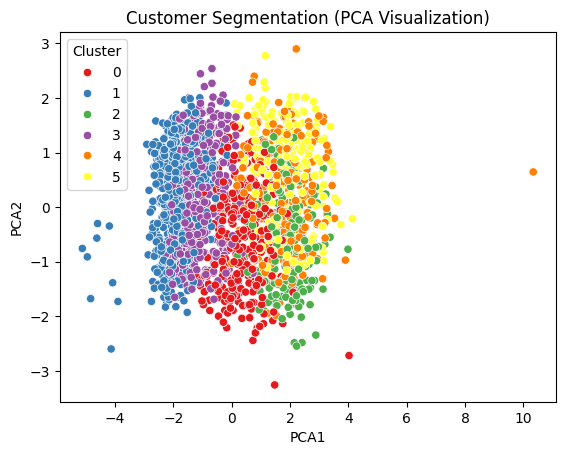

In [134]:
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segmentation (PCA Visualization)')
plt.show()

In [135]:
cluster_summary

,Age,Income,Total Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,60.470414,54419.343195,635.612426,7.248521,5.964497,6.701183,45.715976
1,48.297078,30232.493506,96.334416,2.103896,3.042208,7.110390,55.582792
2,58.820312,65846.667969,1136.894531,7.132812,10.867188,5.449219,45.531250
3,64.403263,40826.498834,123.046620,2.090909,3.601399,5.433566,39.365967
4,46.724138,79881.741379,1320.096552,4.458621,8.079310,2.427586,49.010345
5,70.672474,73957.961672,1200.139373,4.498258,7.996516,2.480836,56.320557


In [137]:
#Cluster 0 High income High spending -> premium customer
#Cluster 2 High web puchases low store purchases -> digital buyers
#CLuster 5 Low recency inactive -> Dormant Customers
#Cluster 6 Low income , low spending -> Budget Customers

In [166]:
import joblib

# Exporting the model and the scaler to pickle files
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [200]:
pip install streamlit

In [183]:
!pip install streamlit

In [179]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib

Overwriting app.py


In [180]:
model = joblib.load('kmeans_model.pkl')
scaler = joblib.load('scaler.pkl')

In [181]:
# App Header
st.title("Customer Segmentation App")
st.write("Enter customer details to predict the segment")

2026-02-19 19:15:47.099 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-19 19:15:47.101 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-19 19:15:47.102 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-19 19:15:47.104 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-19 19:15:47.105 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-19 19:15:47.106 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [182]:
# Input Fields for User Data
age = st.number_input("Age", min_value=18, max_value=100, value=35)
income = st.number_input("Income", min_value=0, max_value=200000, value=50000)
total_spending = st.number_input("Total Spending (sum of purchases)", min_value=0, max_value=5000, value=1000)
web_purchases = st.number_input("Number of Web Purchases", min_value=0, max_value=100, value=10)
store_purchases = st.number_input("Number of Store Purchases", min_value=0, max_value=100, value=10)
web_visits = st.number_input("Web Visits per Month", min_value=0, max_value=50, value=3)
recency = st.number_input("Recency (Days since last purchase)", min_value=0, max_value=365, value=30)

2026-02-19 19:15:51.178 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-19 19:15:51.181 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-19 19:15:51.183 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-19 19:15:51.184 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-19 19:15:51.186 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-19 19:15:51.188 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-19 19:15:51.188 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-19 19:15:51.190 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [184]:
# Formatting Input and Prediction
input_data = pd.DataFrame([[age, income, total_spending, web_purchases, store_purchases, web_visits, recency]],
                         columns=['Age', 'Income', 'Total Spending', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Recency'])

input_scaled = scaler.transform(input_data)

In [185]:
if st.button("Predict Segment"):
    cluster = model.predict(input_scaled)[0]
    st.success(f"The predicted segment is Cluster {cluster[0]}")

2026-02-19 19:16:31.088 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-19 19:16:31.090 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-19 19:16:31.091 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-19 19:16:31.092 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-19 19:16:31.094 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-19 19:16:31.095 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [186]:
!streamlit run app.py &>/dev/null &


In [187]:
!npm install -g localtunnel


⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋
changed 22 packages in 4s
⠋
⠋3 packages are looking for funding
⠋  run `npm fund` for details
⠋

In [188]:
!npx localtunnel --port 8501


⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏your url is: https://heavy-jeans-heal.loca.lt
^C


In [174]:
# You must run this every time you open the notebook
!pip install streamlit watchdog
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧
changed 22 packages in 920ms
⠧
⠧3 packages are looking for funding
⠧  run `npm fund` for details
⠧

In [175]:
!pip install watchdog

In [197]:
%%writefile app.py
import streamlit as st

Overwriting app.py


In [198]:
%%writefile app.py
import streamlit as st

st.title("Test App")
st.write("If you see this, Streamlit works!")


Overwriting app.py


In [199]:
!streamlit run app.py --server.port 8501 --server.address 0.0.0.0 &





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.150.202.178:8501

  Stopping...


In [191]:
# Install localtunnel to expose the port
!npm install -g localtunnel

# Run streamlit in the background
!streamlit run app.py & npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦⠧⠇
changed 22 packages in 1s
⠇
⠇3 packages are looking for funding
⠇  run `npm fund` for details
⠇⠙

⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧your url is: https://metal-oranges-watch.loca.lt

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.150.202.178:8501

  Stopping...
^C


In [178]:
# Get your Tunnel Password first
import urllib
print("Password/Enpoint IP for localtunnel is:", urllib.request.urlopen('https://ident.me').read().decode('utf8'))

# Run the app and the tunnel
!streamlit run app.py & npx localtunnel --port 8501

Password/Enpoint IP for localtunnel is: 34.150.202.178
⠙⠹

⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋your url is: https://tough-doodles-divide.loca.lt

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.150.202.178:8501

  Stopping...
^C


In [165]:
!curl ipv4.icanhazip.com

34.150.202.178


In [189]:
!curl ipv4.icanhazip.com


34.150.202.178


In [192]:
!pip install streamlit pyngrok


In [193]:
!streamlit run app.py &





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.150.202.178:8501

  Stopping...


In [196]:
from pyngrok import ngrok

# Replace 'YOUR_AUTH_TOKEN' with your actual ngrok authtoken
ngrok.set_auth_token('YOUR_AUTH_TOKEN')

public_url = ngrok.connect(8501)
print(public_url)


ERROR:pyngrok.process.ngrok:t=2026-02-19T19:22:31+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: The authtoken you specified does not look like a proper ngrok authtoken.\nYour authtoken: YOUR_AUTH_TOKEN\nInstructions to install your authtoken are on your ngrok dashboard:\nhttps://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_105\r\n"
ERROR:pyngrok.process.ngrok:t=2026-02-19T19:22:31+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: The authtoken you specified does not look like a proper ngrok authtoken.\nYour authtoken: YOUR_AUTH_TOKEN\nInstructions to install your authtoken are on your ngrok dashboard:\nhttps://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_105\r\n"


PyngrokNgrokError: The ngrok process errored on start: authentication failed: The authtoken you specified does not look like a proper ngrok authtoken.\nYour authtoken: YOUR_AUTH_TOKEN\nInstructions to install your authtoken are on your ngrok dashboard:\nhttps://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_105\r\n.